In [1]:
import pandas as pd
# 读取Excel文件
data = pd.read_excel('Factors.xlsx')
data_assets = pd.read_excel('Assets.xlsx')
data_employees = pd.read_excel('失业率.xlsx')
data_growth = pd.read_excel('Growth.xlsx')

In [2]:
columns = [
    "Date",
    "中国:制造业PMI",
    "中国:GDP:现价",
]
data_growth = data_growth[columns]
data_growth = data_growth.rename(columns={
    "中国:制造业PMI": "PMI",
    "中国:GDP:现价": "GDP_现价"
})
data_growth = data_growth.set_index('Date')

In [3]:
columns = [
    "Date",
    "(停止)中国:城镇登记失业率",
    "中国:城镇调查失业率",
]
data_employees = data_employees[columns]

In [4]:
data_employees['失业率'] = data_employees['中国:城镇调查失业率'].combine_first(data_employees['(停止)中国:城镇登记失业率'])

In [5]:
data_employees = data_employees[['Date', '失业率']]
data_employees = data_employees.set_index('Date')

In [6]:
# print(data.head(0))

In [7]:
columns = [
    "Date",
    "中国:CPI:不包括食品和能源(核心CPI):当月同比",
    "中国:CPI:定基指数",
    "中债浮动利率企业债(Depo-1Y)点差曲线(AAA):1年",
    "中国:固定利率国债:发行利率:10年",
    "中国:固定利率国债:发行利率:3个月",
    "中国:逆回购利率:7天",
    "中债固定利率国债全价指数",
    "中国:固定利率国债:发行利率:2年",
]

# 重命名映射（美中对应）
rename_map = {
    "中国:CPI:定基指数": "CPI_指数",
    "中国:CPI:不包括食品和能源(核心CPI):当月同比": "核心CPI_指数",
    "中债浮动利率企业债(Depo-1Y)点差曲线(AAA):1年": "AAA_公司债利率", #中国没有BAA，所以用AAA企业债利率代替
    "中国:固定利率国债:发行利率:10年": "10Y国债利率",
    "中国:固定利率国债:发行利率:3个月": "3M_TBill利率",
    "中国:逆回购利率:7天": "政策利率",
    "中债固定利率国债全价指数": "IEF",
    "中国:固定利率国债:发行利率:2年": "2Y国债利率",
}

In [8]:
data = data[columns]
data = data.rename(columns=rename_map)

In [9]:
data

,Date,核心CPI_指数,CPI_指数,AAA_公司债利率,10Y国债利率,3M_TBill利率,政策利率,IEF,2Y国债利率
0,1990-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1791,2025-03-31,NaN,NaN,NaN,NaN,NaN,1.5,135.0405,NaN
1792,2025-04-02,NaN,NaN,NaN,1.7858,1.4609,NaN,NaN,1.5455
1793,2025-04-08,NaN,NaN,NaN,NaN,NaN,1.5,136.6403,NaN
1794,2025-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data

,核心CPI_指数,CPI_指数,AAA_公司债利率,10Y国债利率,3M_TBill利率,政策利率,IEF,2Y国债利率
Date,,,,,,,,
1990-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-03-31,NaN,NaN,NaN,NaN,NaN,1.5,135.0405,NaN
2025-04-02,NaN,NaN,NaN,1.7858,1.4609,NaN,NaN,1.5455
2025-04-08,NaN,NaN,NaN,NaN,NaN,1.5,136.6403,NaN


In [11]:
columns = [
    "Date",
    "INE原油",
    "沪深300",
    "SHFE黄金"
]

# 重命名映射（美中对应）
rename_map = {
    "INE原油": "WTI",
    "SHFE黄金": "GLD",
    "沪深300": "HS300"
}
data_assets = data_assets[columns]
data_assets = data_assets.rename(columns=rename_map)
data_assets = data_assets.set_index('Date')

In [12]:
# 将data_assets的索引转换为datetime格式
data_assets.index = pd.to_datetime(data_assets.index)

In [13]:
# 将日频数据转换为月频数据
data_assets = data_assets.resample('ME').last()

In [14]:
data_assets

,WTI,HS300,GLD
Date,,,
2000-01-31,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN
...,...,...,...
2024-12-31,559.9,3934.9109,617.60
2025-01-31,602.4,3817.0802,647.54
2025-02-28,540.0,3890.0487,672.12


In [15]:
# 将data和data_assets, data_employees按日期合并
data = data.merge(data_assets, left_index=True, right_index=True, how='left')
data = data.merge(data_employees, left_index=True, right_index=True, how='left')
data = data.merge(data_growth, left_index=True, right_index=True, how='left')

In [16]:
# 使用线形插值法填充季度数据的缺失值
data = data.interpolate(method='linear')

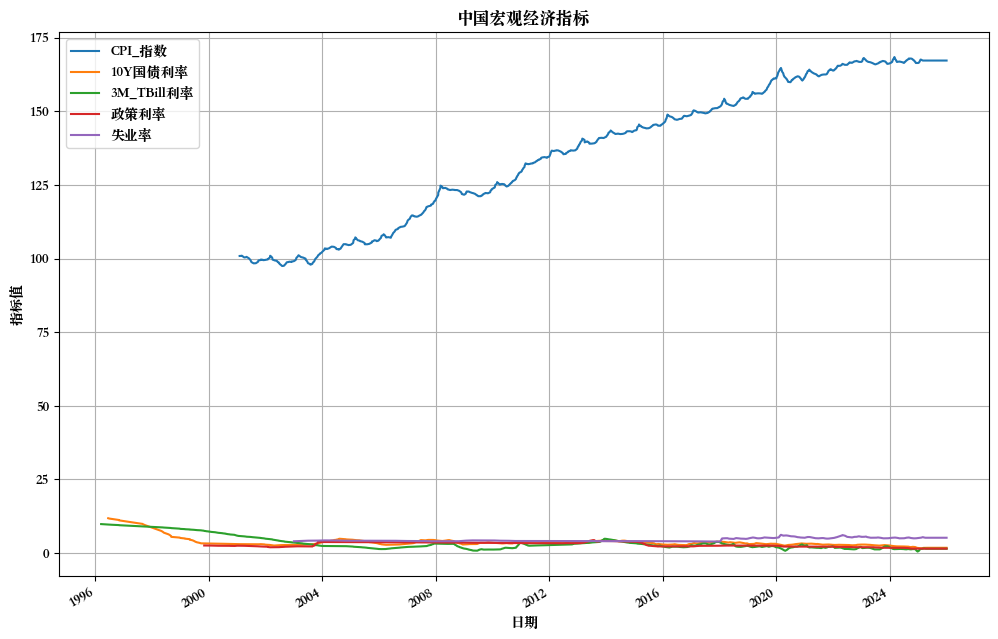

In [17]:
# 绘制清晰好的数据的图表
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False       # 负号显示
data[['CPI_指数', '10Y国债利率', '3M_TBill利率', '政策利率', '失业率']].plot(figsize=(12, 8))
plt.title('中国宏观经济指标')
plt.xlabel('日期')
plt.ylabel('指标值')
plt.legend()
plt.grid()
plt.show()

In [18]:
# 导出为csv文件
data.to_csv('data_China.csv')